In [15]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from binance import Client

In [17]:
api_key = ""
api_secret = ""

In [18]:
import pandas as pd

In [19]:
client = Client(api_key,api_secret)

In [20]:
#datastream via websocket - will not ve covert in this one


In [21]:
pd.DataFrame(client.get_historical_klines("BTCUSDT","1m", "30 min ago UTC"))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1690299780000,29215.00000000,29222.50000000,29214.99000000,29222.49000000,15.73516000,1690299839999,459743.02883410,359,14.22375000,415578.13839120,0
1,1690299840000,29222.49000000,29222.50000000,29222.49000000,29222.50000000,5.59278000,1690299899999,163434.99485600,200,3.72338000,108806.47205000,0
2,1690299900000,29222.50000000,29222.50000000,29199.98000000,29205.99000000,130.28318000,1690299959999,3805029.91117320,869,62.65258000,1829512.37104110,0
3,1690299960000,29205.99000000,29213.67000000,29205.99000000,29213.67000000,16.84695000,1690300019999,492128.53190060,306,12.68391000,370512.04397610,0
4,1690300020000,29213.66000000,29216.87000000,29213.66000000,29216.86000000,13.66977000,1690300079999,399363.19292550,335,11.77666000,344057.16870440,0
5,1690300080000,29216.87000000,29226.87000000,29216.86000000,29224.67000000,57.85030000,1690300139999,1690667.76490960,509,53.37325000,1559821.46708180,0
6,1690300140000,29224.66000000,29224.67000000,29199.99000000,29217.83000000,98.54732000,1690300199999,2878457.11959220,773,53.37417000,1558678.47122940,0
7,1690300200000,29217.82000000,29223.81000000,29217.82000000,29223.81000000,21.41665000,1690300259999,625838.37932730,296,20.71447000,605319.97090990,0
8,1690300260000,29223.80000000,29223.81000000,29200.00000000,29213.99000000,130.67976000,1690300319999,3817222.35966580,953,39.80200000,1162348.51504930,0
9,1690300320000,29214.00000000,29218.48000000,29213.99000000,29218.47000000,17.37208000,1690300379999,507552.82090600,387,11.70577000,341997.06329670,0


In [22]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,interval, lookback + " min ago UTC"))
    frame = frame.iloc[:,:6]
    frame.columns=["Time", "Open", "High","Low","Close","Valume"]
    frame = frame.set_index("Time")
    frame.index = pd.to_datetime(frame.index, unit="ms")
    frame = frame.astype(float)
    return frame

In [23]:
test= getminutedata("BTCUSDT", "1m", "50")

<AxesSubplot:xlabel='Time'>

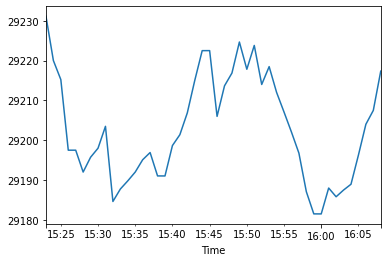

In [24]:
test.Open.plot()

In [25]:
#BUY if asset fell by more then 0.2 % within last 30min
#SELL if asset rises by more then 0.15 % or falls further by 0.15%

In [26]:
def strategytest(symbol,qty,entried=False):
    df = getminutedata(symbol,"1m", "30m")
    cumulret = (df.Open.pct_change() + 1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol, side="BUY", type= "MARKET", quantity=qty)
            
            print(order)
            entried=True
        
        else:
            print("No trade has been executed")
            
            
    if entried:
        while True:
            df=getminutedata(symbol,"1m", "30m")
            sincebuy = df.loc[df.index > pd.to_datetime(order["transactTime"], unit="ms")]
            if len(sincebuy) >0:
                sincebuyret = (sincebuy.Open.pct_change() + 1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] <0.0015:
                    order = client.create_order(symbol=symbol, side="SELL", type= "MARKET", quantity=qty)

                    print(order)
                    break

In [27]:
strategytest("BTCUSDT", 0.001)

No trade has been executed
